In [625]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [626]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
sns.set_style('whitegrid')

train[:20]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [627]:
train.info()
print '--------------------------------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object


In [628]:
missing_age = train[train['Age'].isnull()]
#names_no_age = missing_age['Name']
#missing_age.count()
#missing_age[missing_age['Pclass'] == 3].count()
n = missing_age[missing_age['Survived'] == 0]
n[n['Pclass'] == 3].count()

PassengerId    102
Survived       102
Pclass         102
Name           102
Sex            102
Age              0
SibSp          102
Parch          102
Ticket         102
Fare           102
Cabin            1
Embarked       102
dtype: int64

# Feature Analysis

## Embarked

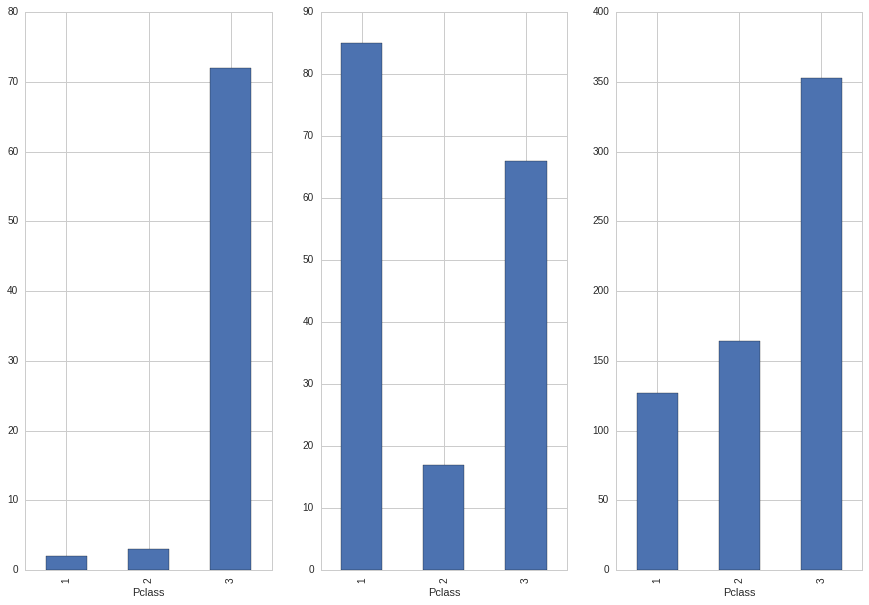

In [629]:
#train["Embarked"] = train["Embarked"].fillna("S")

#em = em_c['Embarked']
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,10))
axis = [axis1, axis2, axis3]
places = ['Q', 'C', 'S']
for i in range(3):
    em_c = train[train['Embarked'] == places[i]]
    em_c = em_c.groupby('Pclass').count()
    em_c['Embarked'].plot(kind='bar', ax=axis[i])
#sns.barplot(x='Pclass', y='Embarked', data=em_c, ax=axis1)
#embarked_dummy = pd.get_dummies(train['Embarked'])
#embarked_dummy.drop(['S'], axis=1, inplace=True)


In [630]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [631]:
classy = train[train['Fare'] > 80.0]
classy = classy[classy['Pclass'] == 1]
classy.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,455.184211,0.763158,1.0,33.727273,0.552632,0.473684,171.049445
Q,329.500000,0.500000,1.0,38.500000,1.500000,0.000000,90.000000
S,464.823529,0.794118,1.0,30.591250,0.764706,1.000000,148.892771


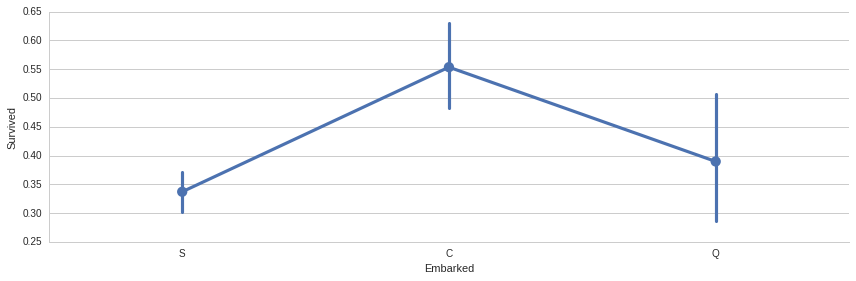

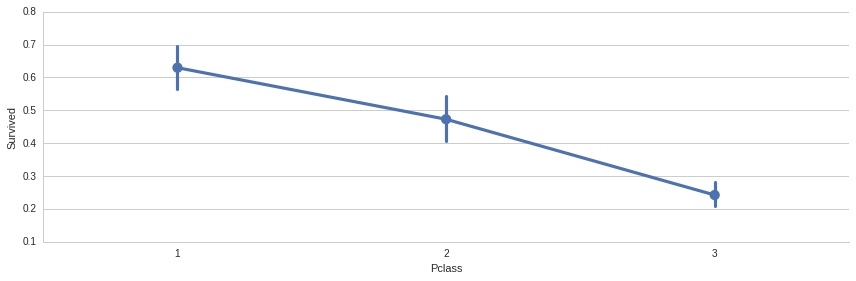

In [632]:
sns.factorplot('Embarked', 'Survived', data=train, size=4, aspect=3)
sns.factorplot('Pclass', 'Survived', data=train, size=4, aspect=3)

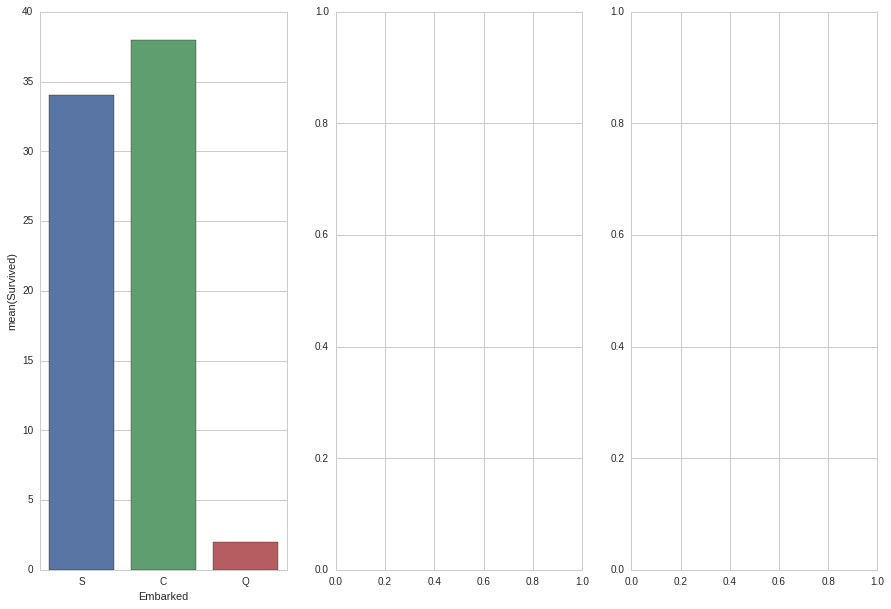

In [633]:
classy_em = classy[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count()
fig, (axis4, axis5, axis6) = plt.subplots(1 ,3,figsize=(15,10))
sns.barplot(x='Embarked', y='Survived', data=classy_em,order=['S', 'C', 'Q'], ax=axis4)
#embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
#sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis4)

Most 1st class people embarked from cherbourg. I mean its possible to fill the missing values with Southampton as most people embarked from there. But given they were first class I think there was a slight more chance it was from cherbourg. Just filling the missing fare value in the test set with the median value. 

In [634]:
train['Embarked'] = train['Embarked'].fillna('C')
# Getting dummies is essentially the same as encoding the information
embarked_dummy_train = pd.get_dummies(train['Embarked'])
embarked_dummy_train.drop(['S'], axis=1, inplace=True)
#trying with dummies and no regularization so far
embarked_dummy_test = pd.get_dummies(test['Embarked'])
embarked_dummy_test.drop(['S'], axis=1, inplace=True)

train = train.join(embarked_dummy_train)
test = test.join(embarked_dummy_test)

train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

## Fare

Running the next block of code we can see that. That the std. of the fare for those who have died is smaller than those that have survived.

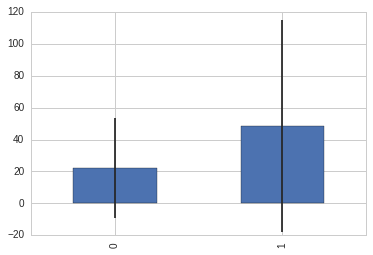

In [635]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

fare_dead = train['Fare'][train['Survived'] == 0]
fare_alive = train['Fare'][train['Survived'] == 1]

avg_fare = DataFrame([fare_dead.mean(), fare_alive.mean()])
std_fare = DataFrame([fare_dead.std(), fare_alive.std()])

#avg_fare.index.names = std_fare.index.names = ['Survived']
avg_fare.plot(yerr=std_fare, kind='bar', legend=False)

## Name

Taken the idea from one of the examples for thsi dataset. There is definitely useful information to be extracted from the name. Namely the title. 

In [636]:
tmp = train[['Name', 'Survived']]
new_title = tmp['Name'].str.split(',').str.get(1)
tmp['Title'] = new_title.str.split(' ', expand=True)[1]
tmp.drop('Name', 1)

tmp[tmp['Title'] == 'Mlle.'] = 'Miss.'
tmp[tmp['Title'] == 'Ms.'] = 'Miss.'
tmp[tmp['Title'] == 'Mme.'] = 'Mrs.'

#'the' is the 'the countess'...i really should change that but it works for
#now as a rare title
rare_titles = ['Dona.', 'Lady.', 'the','Capt.', 'Col.', 'Don.', 
                'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.']
tmp[tmp['Title'].isin(rare_titles)] = 'rare_title'
tmp.groupby('Title').count()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,Name,Survived
Title,,
Master.,40,40
Miss.,185,185
Mr.,517,517
Mrs.,126,126
rare_title,23,23


Now that i've made sure the logic is correct, I'll create the new 'Title feature for the train and test datasets.

In [637]:
rare_titles = ['Dona.', 'Lady.', 'the','Capt.', 'Col.', 'Don.', 
                'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.']

new_title = train['Name'].str.split(',').str.get(1)
train['Title'] = new_title.str.split(' ', expand=True)[1]

train.ix[train.Title == 'Mlle.', 'Title'] = 'Miss.'
train.ix[train.Title == 'Ms.', 'Title'] = 'Miss.'
train.ix[train.Title == 'Mme.', 'Title'] = 'Mrs.'
train.ix[train.Title.isin(rare_titles), 'Title'] = 'Rare title'

new_title = test['Name'].str.split(',').str.get(1)
test['Title'] = new_title.str.split(' ', expand=True)[1]

test.ix[test.Title == 'Mlle.', 'Title'] = 'Miss.'
test.ix[test.Title == 'Ms.', 'Title'] = 'Miss.'
test.ix[test.Title == 'Mme.', 'Title'] = 'Mrs.'
test.ix[test.Title.isin(rare_titles), 'Title'] = 'Rare title'

train_title_dum = pd.get_dummies(train['Title'])
train = train.join(train_title_dum)

test_title_dum = pd.get_dummies(test['Title'])
test = test.join(test_title_dum)

train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

## Family size
I have taken this feature from one of the sample ones, I have just taken influences from multiple samples to start understanding data science. We can see from the graph families do tend to have a higher rate of survival and it is well worth keeping the Family Size feature.

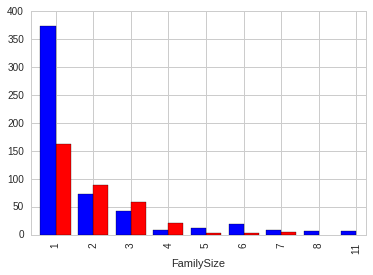

In [638]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
family_alive = train[train['Survived'] == 1]
family_dead = train[train['Survived'] == 0]
family_alive = family_alive.groupby('FamilySize').count()
family_dead = family_dead.groupby('FamilySize').count()
fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.4

family_alive['PassengerId'].plot(kind='bar', color='red', ax=ax, width=width, 
                                    position=0)
family_dead['PassengerId'].plot(kind='bar', color='blue', ax=ax, width=width, 
                                position=1)

## Age
We have sufficient information for Age that we can try and fill in the missing values

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


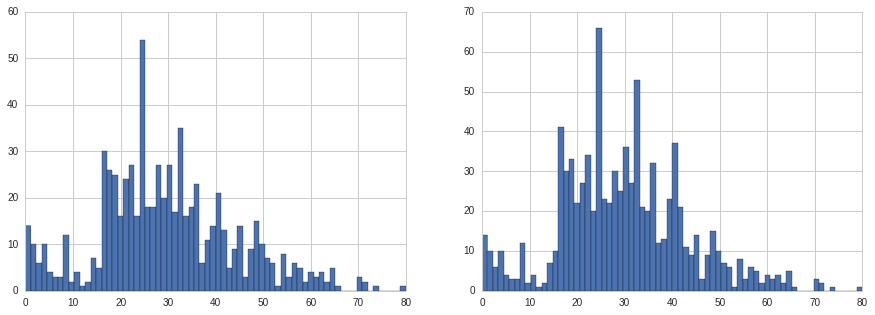

In [639]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# Get the mean and std. to create a distribution.
# Could also use the bayesian library available to sample from.
mean_age_train = train['Age'].mean()
std_age_train = train['Age'].std()
count_nan_age_train = train['Age'].isnull().sum()

mean_age_test = test['Age'].mean()
std_age_test = test['Age'].std()
count_nan_age_test = test['Age'].isnull().sum()

rand_train = np.random.randint(mean_age_train - std_age_train,
                               mean_age_train + std_age_train,
                               size=count_nan_age_train)
rand_test = np.random.randint(mean_age_test - std_age_test,
                               mean_age_test + std_age_test,
                               size=count_nan_age_test)

# Drop all null values and convert to in ie. Age
train['Age'].dropna().astype(int).hist(bins=70, ax=ax1)
train['Age'][np.isnan(train['Age'])] = rand_train
test['Age'][np.isnan(test['Age'])] = rand_test

#We have replaced all the nan values with values sample from Age's distribution
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
train['Age'].hist(bins=70, ax=ax2)


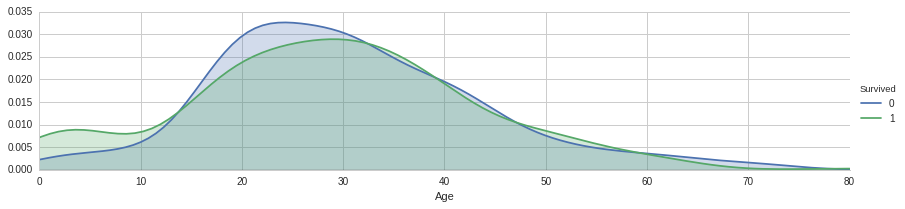

In [640]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

## Sex 
Sex is the gender of the person, but it is in string format, so we are
going to encode it with dummies.

In [641]:
train_sex_dummies = pd.get_dummies(train['Sex'])
train.join(train_sex_dummies)

test_sex_dummies = pd.get_dummies(train['Sex'])
test.join(test_sex_dummies)

train.drop('Sex', axis=1, inplace=True)
test.drop('Sex', axis=1, inplace=True)

In [642]:
# I'm going to drop all the columns that i believe will not influence
# prediction very much

train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

train = train.drop('PassengerId', axis=1)

train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

train.info()
print '--------------------------------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
C             891 non-null uint8
Q             891 non-null uint8
Master.       891 non-null uint8
Miss.         891 non-null uint8
Mr.           891 non-null uint8
Mrs.          891 non-null uint8
Rare title    891 non-null uint8
FamilySize    891 non-null int64
dtypes: float64(1), int64(6), uint8(7)
memory usage: 54.9 KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
C              418 non-nul

## Prediction
Now we have all the features that we want, now is the time to do some predictions, we're gonna try out different types of prediction.

In [643]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

In [644]:
#Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.83277216610549942

In [645]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)
Y_pred_forest = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.98653198653198648

In [646]:
gauss = GaussianNB()

gauss.fit(X_train, Y_train)

y_pred = gauss.predict(X_test)
gauss.score(X_train, Y_train)

0.81818181818181823

In [647]:
svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.88776655443322106

In [648]:
#going to get the correlation Coefficient
coeff = DataFrame(train.columns.delete(0))
coeff.columns = ['Features']

coeff['Coeffieicnet estimate'] = pd.Series(logreg.coef_[0])

coeff

,Features,Coeffieicnet estimate
0,Pclass,-0.889862
1,Age,-0.020678
2,SibSp,-0.908699
3,Parch,-0.720779
4,Fare,0.004726
5,C,0.431026
6,Q,0.293128
7,Master.,1.499142
8,Miss.,1.243909
9,Mr.,-1.595958


In [649]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        'Survived': Y_pred
    })
submission.to_csv('titanic.csv', index=False)